In [2]:
#do all the imports
import nltk
import os
import glob

In [3]:
#import email parser from email.parser
from nltk.tokenize import sent_tokenize
from email.parser import Parser
from collections import Counter

In [31]:
#import matplotlib
import matplotlib.pyplot as py
from datetime import datetime
import re
import string

In [4]:
#os.getcwd method returns the current working directory 
cwd = os.path.dirname(os.getcwd()) 
print("Current working directory : %s" % os.getcwd())

Current working directory : /Users/karandutt


In [5]:
#so i downloaded the tgz file extracted it and made a path as specified in the question
cp = cwd + '/dutt_karan_spring2017/Midterm/Data/Enron/maildir/'
print("Current path : %s" % cp)

Current path : /Users/dutt_karan_spring2017/Midterm/Data/Enron/maildir/


In [13]:
enron_data = lambda cp : [os.path.join(dirpath, f) #os.path.join will join the path components
                       for dirpath, dirname, files in os.walk(cp) #from docs.python.org
                       for f in files]
print(enron_data)

<function <lambda> at 0x10de2f6a8>


In [33]:
    #through this piece of code, i could find out how many subdirectories were there in each directory and the length of the filenames 
dir = '/Users/karandutt/dutt_karan_spring2017/Midterm/Data/Enron/maildir/'
for directory, subdirectory, filenames in os.walk(dir): # eg. allen-p had 10 subdirectories
    print(directory, len(subdirectory), len(filenames)) # allen-p/_sent_mail had no subdirectories but 602 filenames ie txt files

/Users/karandutt/dutt_karan_spring2017/Midterm/Data/Enron/maildir/ 150 1
/Users/karandutt/dutt_karan_spring2017/Midterm/Data/Enron/maildir/allen-p 10 1
/Users/karandutt/dutt_karan_spring2017/Midterm/Data/Enron/maildir/allen-p/_sent_mail 0 602
/Users/karandutt/dutt_karan_spring2017/Midterm/Data/Enron/maildir/allen-p/all_documents 0 628
/Users/karandutt/dutt_karan_spring2017/Midterm/Data/Enron/maildir/allen-p/contacts 0 2
/Users/karandutt/dutt_karan_spring2017/Midterm/Data/Enron/maildir/allen-p/deleted_items 0 361
/Users/karandutt/dutt_karan_spring2017/Midterm/Data/Enron/maildir/allen-p/discussion_threads 0 412
/Users/karandutt/dutt_karan_spring2017/Midterm/Data/Enron/maildir/allen-p/inbox 0 66
/Users/karandutt/dutt_karan_spring2017/Midterm/Data/Enron/maildir/allen-p/notes_inbox 0 48
/Users/karandutt/dutt_karan_spring2017/Midterm/Data/Enron/maildir/allen-p/sent 0 562
/Users/karandutt/dutt_karan_spring2017/Midterm/Data/Enron/maildir/allen-p/sent_items 0 345
/Users/karandutt/dutt_karan_spr

In [53]:
#Kenneth Lay was the CEO and Chairman of Enron Corporation 
readfile = '/Users/karandutt/dutt_karan_spring2017/Midterm/Data/Enron/maildir/lay-k/all_documents/3.' #go into subdirectory 
with open(readfile, "r") as f: # and read filename 3. which is a txt file with mime
    data = f.read()
print(data)

Message-ID: <10250203.1075840200733.JavaMail.evans@thyme>
Date: Tue, 27 Jul 1999 10:26:00 -0700 (PDT)
From: elizabeth.lay@enron.com
To: kenneth.lay@enron.com
Subject: Re: Contact information
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Elizabeth Lay
X-To: Kenneth Lay
X-cc: 
X-bcc: 
X-Folder: \Kenneth_Lay_Dec2000\Notes Folders\All documents
X-Origin: LAY-K
X-FileName: klay.nsf

Try 011-541-14516 6728, you may need the second one. Let me know if you 
continue to have problems. 
Take care, Liz




Kenneth Lay@ENRON
07/26/99 10:49 AM
Sent by: Rosalee Fleming@ENRON
To: Elizabeth Lay/ENRON_DEVELOPMENT@AZURIX@ENRON_DEVELOPMENT
cc:  

Subject: Re: Contact information  

Hi Liz -

Liz - I tried to call your office number, but it doesn't go through.  Will 
you double check the number?

I haven't tried your cellular!

Rosie



To: Kenneth Lay@ENRON_DEVELOPMENT
cc:  
Subject: Contact information

Dad-
My celluar number is: 011 541-14-030 5355

In [56]:
email = Parser().parsestr(data)
print("To: " , email['to'])
print("From: " , email['from'])
print("Subject: " , email['subject'])
#print("Body: " , email.get_payload()) #returns a list

To:  kenneth.lay@enron.com
From:  elizabeth.lay@enron.com
Subject:  Re: Contact information


In [4]:
#this piece of code will basically create 3 txt files namely from_email_list, to_email_list
#and email_body
import os
from email.parser import Parser
dir = '/Users/karandutt/dutt_karan_spring2017/Midterm/Data/Enron/maildir/lay-k/family/'
def email_analyse(inputfile, to_email_list, from_email_list, email_body):
    with open(inputfile, "r") as f:
        data = f.read()
    email = Parser().parsestr(data)
    to_email_list.append(email['to'])
    from_email_list.append(email['from'])
    email_body.append(email.get_payload())
to_email_list = [] #create empty list for to email
from_email_list = [] #create empty list for from email
email_body = [] #create email body empty list
for directory, subdirectory, filenames in os.walk(dir):
    for filename in filenames:
        email_analyse(os.path.join(directory, filename), to_email_list, from_email_list, email_body )
with open("to_email_list.txt", "w") as f: #write
    for to_email in to_email_list:
        if to_email:
            f.write(to_email)
            f.write("\n")
with open("from_email_list.txt", "w") as f: #write
    for from_email in from_email_list:
        if from_email:
            f.write(from_email)
            f.write("\n")        
with open("email_body.txt", "w") as f: #write
    for email_bod in email_body:
        if email_bod:
            f.write(email_bod)
            f.write("\n")   

In [16]:
#To email address and From email address
import os
from collections import Counter
from email.parser import Parser
dir = '/Users/karandutt/dutt_karan_spring2017/Midterm/Data/Enron/maildir/lay-k/'
def email_analyse(inputfile, to_email_list, from_email_list, email_body):
    with open(inputfile, "r", encoding = "ISO-8859-1") as f:
        data = f.read()
    email = Parser().parsestr(data)    
    if email['to']:
        email_to = email['to']
        email_to = email_to.replace("\n", "") #remove all the newline characters
        email_to = email_to.replace("\t", "") #remove all the tabs
        email_to = email_to.replace(" ", "") #remove all the redundant spaces 
        email_to = email_to.split(",") #split with commas
        for email_to_1 in email_to:
            to_email_list.append(email_to_1)
    from_email_list.append(email['from'])
    email_body.append(email.get_payload())
to_email_list = []
from_email_list = []
email_body = []
for directory, subdirectory, filenames in  os.walk(dir):
    for filename in filenames:
        email_analyse(os.path.join(directory, filename), to_email_list, from_email_list, email_body )
print("\nTo email adresses: \n")
print(Counter(to_email_list).most_common(10)) #counts all the unique 
print("\nFrom email adresses: \n")
print(Counter(from_email_list).most_common(10))


To email adresses: 

[('kenneth.lay@enron.com', 2039), ('klay@enron.com', 1903), ('jeff.skilling@enron.com', 372), ('mark.koenig@enron.com', 313), ('mark.frevert@enron.com', 304), ('greg.whalley@enron.com', 304), ('steven.kean@enron.com', 278), ('mike.mcconnell@enron.com', 261), ('jeffrey.mcmahon@enron.com', 251), ('john.sherriff@enron.com', 244)]

From email adresses: 

[('rosalee.fleming@enron.com', 856), ('brown_mary_jo@lilly.com', 82), ('leonardo.pacheco@enron.com', 78), ('savont@email.msn.com', 66), ('tori.wells@enron.com', 58), ('elizabeth.davis@compaq.com', 50), ('no.address@enron.com', 47), ('katherine.brown@enron.com', 47), ('mrslinda@lplpi.com', 40), ('lizard_ar@yahoo.com', 36)]


# Conclusion
- Kenneth Lay, Chairman and CEO of Enron had two email address and not just one kenneth.lay@enron.com and klay@enron.com
- Most of the emails were sent from Kenneths own email address
- Most of the emails he received were from Rosalee Fleming. 
- We know that Lay received most emails from Fleming since we are yet in lay-k directory.

In [8]:
import nltk
#try to understand what the message body had information about by finding out common words
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
with open("email_body.txt", "r", encoding = "ISO-8859-1") as f:
    data = f.read()
words= word_tokenize(data)
useful_words = [word for word in words if word not in stopwords.words('English')]
frequency = nltk.FreqDist(useful_words)
print(frequency.most_common(100))

[(',', 44), ('.', 32), ('-', 26), ('I', 19), (':', 17), ('>', 14), ('@', 13), ('--', 12), ('would', 10), ('2000', 8), (';', 8), ('<', 8), ('like', 7), ('?', 7), ('Lay', 6), (')', 6), ('(', 6), ('July', 6), ('Pate', 5), ('Fund', 5), ('Zach', 5), ('4', 4), ('Herrold', 4), ('birth', 4), ('Beau', 4), ('address', 4), ('Howard', 4), ('Linda', 4), ('att1.htm', 3), ('&', 3), ('PM', 3), ('house', 3), ('David', 3), ('photos', 3), ('e-mail', 3), ('June', 3), ('Mark', 3), ('If', 3), ('VERY', 3), ('To', 3), ('Natalie', 3), ('time', 3), ('From', 3), ('Sent', 3), ('know', 3), ('new', 3), ('Subject', 3), ('Love', 3), ('Message', 3), ('Family', 3), ('We', 3), ('aol.com', 3), ('#', 2), (']', 2), ("'s", 2), ('Since', 2), ('looks', 2), ('force', 2), ('Poppopindc', 2), ('sure', 2), ('also', 2), ('Baby', 2), ('Tuesday', 2), ('Big', 2), ('Ken', 2), ('well', 2), ('meet', 2), ('Vermeil', 2), ('aka', 2), ('[', 2), ('10', 2), ('Dear', 2), ('let', 2), ('LPL', 2), ('This', 2), ('lplpi.com', 2), ('good', 2), ('mrsl

In [96]:
#fromkeys method baiscally creates a new dictionary with keys from seq and values set to value
mailcount = dict.fromkeys(range(1,32),0) #date range will be 1-31 which is the seq
for directory, subdirectory, filenames in os.walk(dir):
        if directory.endswith("/sent"):
            for f in filenames:
                with open(os.path.join(directory, f),'r',encoding='utf-8',errors='ignore') as e:
                    data = e.read()
                    email = Parser().parsestr(data)
                    day  = email["Date"][4:7]
                    day = int(day)
                    if day in mailcount:
                        mailcount[day]+= 1

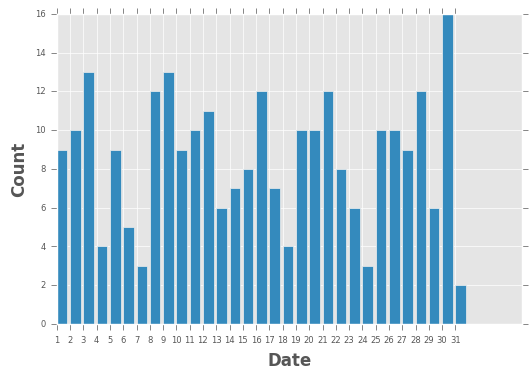

In [97]:
#use matplotlib and plot
x = [] #create empty list to add the values
y = [] #create empty list to add the values
for m in mailcount:
    x.append(m) #append the range ie 1-31 as the range has been given as 1,32
    y.append(mailcount[m]) #this will show the number of mails

py.style.use('ggplot') #matplotlib documentation
py.rcParams['xtick.labelsize'] = 6
py.rcParams['ytick.labelsize'] = 6
py.bar(range(len(mailcount)),y)
py.xticks(range(len(mailcount)),x,)
py.ylabel('Count') #y-axis label
py.xlabel('Date')  #x-axis label
py.show()          #plot

In [25]:
import glob
max= 1
maxname = ''
dir = '/Users/karandutt/dutt_karan_spring2017/Midterm/Data/Enron/maildir/'
for f in os.listdir(dir):
    path1 = dir +'/'+f+'/sent_items'
    for filename in glob.glob(path1):
        num_files = len([fname for fname in os.listdir(path1)
                if os.path.isfile(os.path.join(path1, fname))])   
        if(max<num_files):
            max=num_files
            maxname = f
print("Maximum number by "+maxname+":",max)

Maximum number by kaminski-v: 1696


# Conclusion 
- Former Enron executive Vincent Kaminski has sent 1696 mails